In [1]:
cd ../brainmix_register/

/home/thunder/Documents/work/UO_Data_Science/Brainscan_project/brainmix_register/brainmix_register


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.measure import structural_similarity as ssim
from skimage.feature import register_translation
from skimage.feature.register_translation import _upsampled_dft
from scipy.ndimage.fourier import fourier_shift
from skimage.transform import pyramid_gaussian
from skimage import io

import registration as reg
from registration import registration

import os, glob
from itertools import islice
%matplotlib inline 

matplotlib.rcParams['font.size'] = 9

def mse(x, y):
    return np.linalg.norm(x - y)

#---------Create registration stack------------
inputDir = '../data/test/'
imageFiles = glob.glob(os.path.join(inputDir, '*.jpg'))
imageVolume = io.ImageCollection(imageFiles, as_grey=True).concatenate()
stack = imageVolume



In [3]:
############# Image pre-processing layer ##########################
def downsample_image(stack):
    """ Returns a stack with each image downsampled.

    I use pyramid_gaussian to downsample the images.
    pyramid_gaussian outputs a generator yielding pyramid layers as float images.
    """

    """Set parameters"""
    layer = 1
    downscale = 2

    """Get downsampled stack"""
    downsampled = [next(islice(pyramid_gaussian(img, downscale=downscale), layer, layer + 1)) for img in stack] #islice gets a single layer from the pyramid.


    return downsampled

In [4]:
stack = downsample_image(stack)

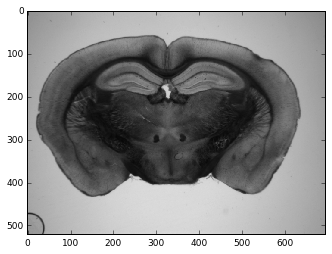

In [5]:
io.imshow(stack[1])

In [6]:
def recursive_reg(stack, iter_num):
    src = stack[0]
    
    
    
        
    label = 'MSE: %2.f, SSIM: %.2f'
    
    if iter_num < 1:
        reg_img = stack[1]
        
        ssim_reg = ssim(src, reg_img)
        mse_reg = mse(src, reg_img)
        print("Iteration: ", iter_num)
        print(label % (mse_reg, ssim_reg))
        return stack
    
    else:
        reg_stack = registration(recursive_reg(stack, iter_num - 1))
        reg_img = reg_stack[1]        
        ssim_reg = ssim(src, reg_img)
        mse_reg = mse(src, reg_img)
        
        print("Iteration: ", iter_num)
        print(label % (mse_reg, ssim_reg))
        return reg_stack
    

In [7]:
reg_stack = recursive_reg(stack, 1)

('Iteration: ', 0)
MSE: 71, SSIM: 0.79
('Iteration: ', 1)
MSE: 79, SSIM: 0.78


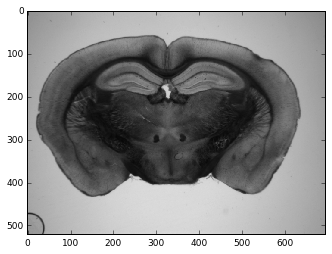

In [8]:
io.imshow(stack[1])

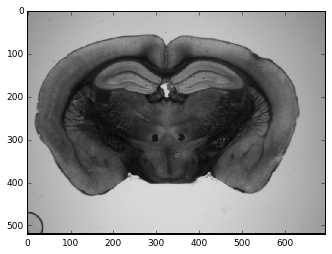

In [ ]:
io.imshow(reg_stack[1])

In [ ]:
reg_stack = recursive_reg(stack, 5)

('Iteration: ', 0)
MSE: 71, SSIM: 0.79
('Iteration: ', 1)
MSE: 79, SSIM: 0.78
('Iteration: ', 2)

In [ ]:
io.imshow(reg_stack[1])

In [ ]:
from skimage import data
from skimage import transform as tf
from skimage.color import rgb2gray

img1 = rgb2gray(data.astronaut())    
img2 = tf.rotate(img1, 25)

stack = [img1, img2]

In [ ]:
reg_stack = recursive_reg(stack, 0)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 3))

ax1.imshow(stack[0])
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(stack[1])
ax2.set_axis_off()
ax2.set_title('Offset image')

ax3.imshow(reg_stack[1])
ax3.set_axis_off()
ax3.set_title('Registered image')

In [ ]:
reg_stack = recursive_reg(stack, 1)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 3))

ax1.imshow(stack[0])
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(stack[1])
ax2.set_axis_off()
ax2.set_title('Offset image')

ax3.imshow(reg_stack[1])
ax3.set_axis_off()
ax3.set_title('Registered image')

In [ ]:
reg_stack = recursive_reg(stack, 5)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 3))

ax1.imshow(stack[0])
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(stack[1])
ax2.set_axis_off()
ax2.set_title('Offset image')

ax3.imshow(reg_stack[1])
ax3.set_axis_off()
ax3.set_title('Registered image')